In [1]:
import numpy as np
import pandas as pd
from astropy.io import ascii
import os
import matplotlib.pyplot as plt
import mpl_scatter_density
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('Catalogues/NGC2539_4.csv')
data

,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,120.750245,-12.176855,3036167945540297216,0.0871,0.0647,0.8691,0.1415,3.414,-3.204,0.141,...,1.031,18.310925,19.155960,17.442314,1.713646,NaN,-31.849131,120.750260,-12.176860,0.893827
1,120.748502,-12.169048,3036168014259997824,0.3567,0.2588,0.8023,0.6067,2.525,-2.522,0.528,...,1.033,20.078209,20.758951,19.249168,1.509783,NaN,-31.841959,120.748514,-12.169048,0.798188
2,120.774801,-12.163916,3036173851116718848,0.2784,0.2068,0.7845,0.4647,2.086,-1.933,0.416,...,1.023,19.835163,20.270933,19.323252,0.947681,NaN,-31.830819,120.774810,-12.163912,0.797336
3,120.828863,-12.102368,3036174503951833984,0.3092,0.2460,0.6575,0.5399,2.136,-2.117,0.436,...,1.046,20.013603,20.620640,19.541338,1.079302,NaN,-31.758399,120.828872,-12.102367,0.665763
4,120.830799,-12.110140,3036174508246849152,0.3851,0.2784,0.8398,0.7343,4.241,-4.052,0.606,...,1.015,20.334070,21.634747,19.380322,2.254425,NaN,-31.765490,120.830818,-12.110146,0.819051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12248,122.595626,-10.841704,5728387720230650880,0.2191,0.2004,0.6737,0.3649,3.849,-3.663,0.338,...,1.022,19.428995,20.133577,18.738420,1.395157,NaN,-30.113705,122.595642,-10.841699,0.681967
12249,122.605064,-10.840512,5728387823309867136,0.2117,0.1868,0.5995,0.3435,1.575,-0.521,0.333,...,0.991,19.432290,19.966003,18.762100,1.203903,NaN,-30.110253,122.605066,-10.840505,0.614925
12250,122.441781,-10.867706,5728389644375975424,0.1436,0.1257,0.5921,0.2286,2.406,-2.406,0.236,...,1.031,18.805159,19.301994,18.132660,1.169334,NaN,-30.176260,122.441792,-10.867706,0.614038
12251,122.439955,-10.866530,5728389644376189952,0.1428,0.1257,0.6225,0.2265,2.891,-2.606,0.237,...,0.997,18.811468,19.214546,18.213182,1.001364,NaN,-30.175563,122.439967,-10.866535,0.644494


In [4]:
data2 = data[["RAJ2000", "DEJ2000","pmRA", "pmDE", "Gmag", "BP-RP", "Plx"]].copy()

In [5]:
# Contar quantas linhas têm pelo menos um NaN nas colunas selecionadas
nan_rows = data2.isna().sum(axis=1) > 0
num_nan_rows = nan_rows.sum()

# Exibir o número total de linhas com NaN
print(f"Linhas com pelo menos um NaN: {num_nan_rows}")

Linhas com pelo menos um NaN: 125


In [6]:
data2_clean = data2.dropna()

In [11]:
#Obtendo apenas as features que vamos utilizar
df1 = data2_clean[["RAJ2000", "DEJ2000", "pmDE", "BP-RP", "Plx"]].copy()
# Remover linhas com NaN
df1_clean = df1

In [12]:
#obtendo apenas os valores para normalizar
X = df1_clean.values

In [13]:
# Normalizar os dados 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
gmm = GaussianMixture(n_components = 5, tol=1e-7,max_iter=1000, random_state=62).fit(X_scaled)
cluster = gmm.predict(X_scaled)

In [15]:
# Adicionando os clusters ao DataFrame
df1_clean.loc[:, 'Cluster'] = cluster

In [16]:
# Verificando a distribuição dos clusters
print(df1_clean['Cluster'].value_counts())

Cluster
4    3744
0    2812
3    2667
2    1525
1    1380
Name: count, dtype: int64


In [17]:
# Verificando a média das features por cluster
print(df1_clean.groupby('Cluster').mean())

            RAJ2000    DEJ2000      pmDE     BP-RP       Plx
Cluster                                                     
0        122.605000 -12.953280  0.156789  1.114819  0.612329
1        121.184160 -12.386772 -0.114453  1.338775  0.729812
2        122.646643 -12.809461 -1.959587  1.398278  0.710016
3        122.627231 -12.931577  0.973412  1.336418  0.739910
4        122.855219 -12.930079 -0.328677  1.264567  0.756930


In [18]:
df2 = data2_clean.assign(cluster=df1_clean["Cluster"])

In [20]:
a1 = df2[df2["cluster"]==0]
a2 = df2[df2["cluster"]==1]
a3 = df2[df2["cluster"]==2]
a4 = df2[df2["cluster"]==3]
a5 = df2[df2["cluster"]==4]

Text(0, 0.5, 'Gmag (mag)')

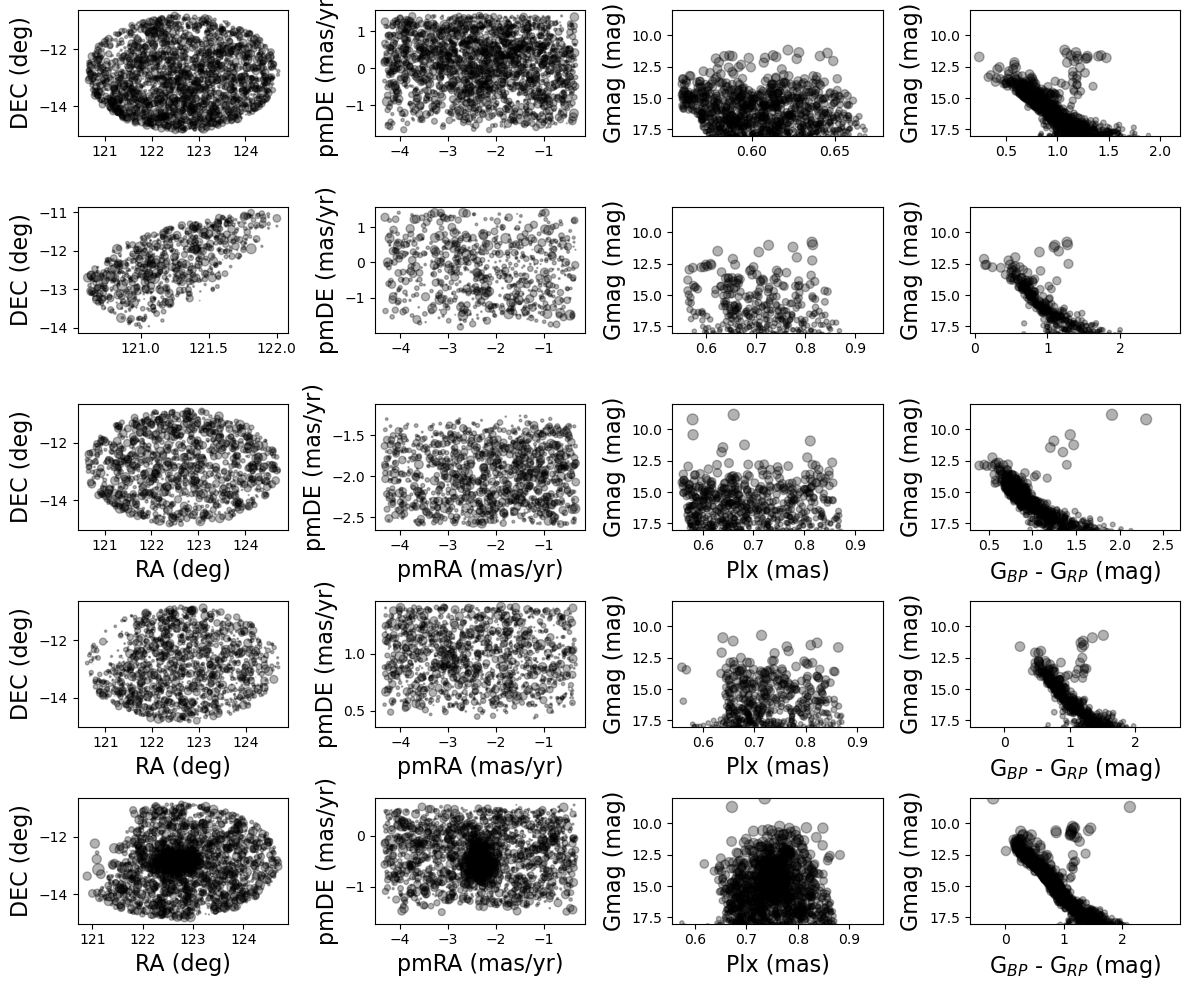

In [22]:
fig,ax = plt.subplots(5,4, figsize=(12,10),tight_layout=True)

ax[0,0].scatter(a1.RAJ2000, a1.DEJ2000, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,0].set_ylabel("DEC (deg)",fontsize=16)
ax[0,1].scatter(a1.pmRA, a1.pmDE, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[0,2].scatter(a1.Plx, a1.Gmag, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,2].set_ylim(18,8)
ax[0,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[0,3].scatter(a1["BP-RP"], a1.Gmag, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,3].set_ylim(18,8)
ax[0,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[1,0].scatter(a2.RAJ2000, a2.DEJ2000, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,0].set_ylabel("DEC (deg)",fontsize=16)
ax[1,1].scatter(a2.pmRA, a2.pmDE, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[1,2].scatter(a2.Plx, a2.Gmag, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,2].set_ylim(18,8)
ax[1,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[1,3].scatter(a2["BP-RP"], a2.Gmag, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,3].set_ylim(18,8)
ax[1,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[2,0].scatter(a3.RAJ2000, a3.DEJ2000, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,0].set_xlabel("RA (deg)",fontsize=16)
ax[2,0].set_ylabel("DEC (deg)",fontsize=16)
ax[2,1].scatter(a3.pmRA, a3.pmDE, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,1].set_xlabel("pmRA (mas/yr)",fontsize=16)
ax[2,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[2,2].scatter(a3.Plx, a3.Gmag, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,2].set_ylim(18,8)
ax[2,2].set_xlabel("Plx (mas)",fontsize=16)
ax[2,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[2,3].scatter(a3["BP-RP"], a3.Gmag, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,3].set_ylim(18,8)
ax[2,3].set_xlabel(r"G$_{BP}$ - G$_{RP}$ (mag)",fontsize=16)
ax[2,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[3,0].scatter(a4.RAJ2000, a4.DEJ2000, color='k', s=(19.5-a4.Gmag)*6, alpha=0.3)
ax[3,0].set_xlabel("RA (deg)",fontsize=16)
ax[3,0].set_ylabel("DEC (deg)",fontsize=16)
ax[3,1].scatter(a4.pmRA, a4.pmDE, color='k', s=(19.5-a4.Gmag)*6, alpha=0.3)
ax[3,1].set_xlabel("pmRA (mas/yr)",fontsize=16)
ax[3,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[3,2].scatter(a4.Plx, a4.Gmag, color='k', s=(19.5-a4.Gmag)*6, alpha=0.3)
ax[3,2].set_ylim(18,8)
ax[3,2].set_xlabel("Plx (mas)",fontsize=16)
ax[3,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[3,3].scatter(a4["BP-RP"], a4.Gmag, color='k', s=(19.5-a4.Gmag)*6, alpha=0.3)
ax[3,3].set_ylim(18,8)
ax[3,3].set_xlabel(r"G$_{BP}$ - G$_{RP}$ (mag)",fontsize=16)
ax[3,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[4,0].scatter(a5.RAJ2000, a5.DEJ2000, color='k', s=(19.5-a5.Gmag)*6, alpha=0.3)
ax[4,0].set_xlabel("RA (deg)",fontsize=16)
ax[4,0].set_ylabel("DEC (deg)",fontsize=16)
ax[4,1].scatter(a5.pmRA, a5.pmDE, color='k', s=(19.5-a5.Gmag)*6, alpha=0.3)
ax[4,1].set_xlabel("pmRA (mas/yr)",fontsize=16)
ax[4,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[4,2].scatter(a5.Plx, a5.Gmag, color='k', s=(19.5-a5.Gmag)*6, alpha=0.3)
ax[4,2].set_ylim(18,8)
ax[4,2].set_xlabel("Plx (mas)",fontsize=16)
ax[4,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[4,3].scatter(a5["BP-RP"], a5.Gmag, color='k', s=(19.5-a5.Gmag)*6, alpha=0.3)
ax[4,3].set_ylim(18,8)
ax[4,3].set_xlabel(r"G$_{BP}$ - G$_{RP}$ (mag)",fontsize=16)
ax[4,3].set_ylabel("Gmag (mag)",fontsize=16)

In [24]:
print(df2.groupby('cluster').mean())

            RAJ2000    DEJ2000      pmRA      pmDE       Gmag     BP-RP  \
cluster                                                                   
0        122.605000 -12.953280 -2.025741  0.156789  18.118450  1.114819   
1        121.184160 -12.386772 -2.012583 -0.114453  18.738991  1.338775   
2        122.646643 -12.809461 -2.091244 -1.959587  17.997167  1.398278   
3        122.627231 -12.931577 -2.153343  0.973412  18.968797  1.336418   
4        122.855219 -12.930079 -2.074766 -0.328677  18.114117  1.264567   

              Plx  
cluster            
0        0.612329  
1        0.729812  
2        0.710016  
3        0.739910  
4        0.756930  


In [25]:
#a1.to_csv('Catalogues/pop1_NGC2539_GMM2.csv', index=False) 
#a2.to_csv('Catalogues/pop2_NGC2539_GMM2.csv', index=False) 
#a3.to_csv('Catalogues/pop3_NGC2539_GMM2.csv', index=False) 
#a4.to_csv('Catalogues/pop4_NGC2539_GMM2.csv', index=False) 
#a5.to_csv('Catalogues/pop5_NGC2539_GMM2.csv', index=False) 